In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_excel('Flightfare_Data_Train.xlsx')
test=pd.read_excel('Flightfare_Test_Set.xlsx')

In [5]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [7]:
#Combining the train and test data into a single file
train['Set']='train'
test['Set']='test'
data=pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,data.shape)

(10683, 12) (2671, 11) (13354, 12)


In [8]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Set
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [9]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [10]:
data['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [11]:
#Dropping the column since majority of the cells contain No info
data.drop(['Additional_Info'],axis=1,inplace=True)

In [12]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Price              float64
Set                 object
dtype: object

In [13]:
data['Date_of_Journey'] = data['Date_of_Journey'].astype('datetime64[ns]')
data['Dep_Time'] =pd.to_datetime(data['Dep_Time'],format='%H:%M').dt.time


In [14]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Price                     float64
Set                        object
dtype: object

In [15]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Set
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,non-stop,3897.0,train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,7662.0,train
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2 stops,13882.0,train
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,6218.0,train
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30:00,20:25 07 Jun,23h 55m,1 stop,NaN,test
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20:00,16:55,2h 35m,non-stop,NaN,test
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50:00,04:25 07 Mar,6h 35m,1 stop,NaN,test
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00:00,19:15,15h 15m,1 stop,NaN,test


In [16]:
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [17]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Set
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897.0,train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662.0,train
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882.0,train
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218.0,train
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302.0,train
...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,NaN,test
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,NaN,test
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,NaN,test
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,NaN,test


In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Duration                   object
Total_Stops                object
Price                     float64
Set                        object
dtype: object

In [19]:
data.Duration.str.split(expand=True)

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
13349,23h,55m
13350,2h,35m
13351,6h,35m
13352,15h,15m


In [20]:
data['Duration(hrs)']=(data.Duration.str.split(expand=True))[0]

In [21]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Set,Duration(hrs)
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897.0,train,2h
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662.0,train,7h
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882.0,train,19h
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218.0,train,5h
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302.0,train,4h
...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,NaN,test,23h
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,NaN,test,2h
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,NaN,test,6h
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,NaN,test,15h


In [22]:
data['Duration(hrs)']=data['Duration(hrs)'].str.replace('h','')

In [23]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Set,Duration(hrs)
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897.0,train,2
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662.0,train,7
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882.0,train,19
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218.0,train,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302.0,train,4
...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,NaN,test,23
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,NaN,test,2
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,NaN,test,6
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,NaN,test,15


In [24]:
data.drop(['Duration'],axis=1,inplace=True)

In [25]:
data.drop(['Route'],axis=1,inplace=True)

In [26]:
data

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Set,Duration(hrs)
0,IndiGo,2019-03-24,Banglore,New Delhi,non-stop,3897.0,train,2
1,Air India,2019-01-05,Kolkata,Banglore,2 stops,7662.0,train,7
2,Jet Airways,2019-09-06,Delhi,Cochin,2 stops,13882.0,train,19
3,IndiGo,2019-12-05,Kolkata,Banglore,1 stop,6218.0,train,5
4,IndiGo,2019-01-03,Banglore,New Delhi,1 stop,13302.0,train,4
...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,1 stop,NaN,test,23
13350,IndiGo,2019-03-27,Kolkata,Banglore,non-stop,NaN,test,2
13351,Jet Airways,2019-06-03,Delhi,Cochin,1 stop,NaN,test,6
13352,Air India,2019-06-03,Delhi,Cochin,1 stop,NaN,test,15


In [27]:
data['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [28]:
data['Total_Stops']=data['Total_Stops'].replace('non-stop',0)
data['Total_Stops']=data['Total_Stops'].replace('1 stop',1)
data['Total_Stops']=data['Total_Stops'].replace('2 stops',2)
data['Total_Stops']=data['Total_Stops'].replace('3 stops',3)
data['Total_Stops']=data['Total_Stops'].replace('4 stops',4)



In [29]:
data

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Set,Duration(hrs)
0,IndiGo,2019-03-24,Banglore,New Delhi,0.0,3897.0,train,2
1,Air India,2019-01-05,Kolkata,Banglore,2.0,7662.0,train,7
2,Jet Airways,2019-09-06,Delhi,Cochin,2.0,13882.0,train,19
3,IndiGo,2019-12-05,Kolkata,Banglore,1.0,6218.0,train,5
4,IndiGo,2019-01-03,Banglore,New Delhi,1.0,13302.0,train,4
...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,1.0,NaN,test,23
13350,IndiGo,2019-03-27,Kolkata,Banglore,0.0,NaN,test,2
13351,Jet Airways,2019-06-03,Delhi,Cochin,1.0,NaN,test,6
13352,Air India,2019-06-03,Delhi,Cochin,1.0,NaN,test,15


In [30]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Total_Stops               float64
Price                     float64
Set                        object
Duration(hrs)              object
dtype: object

In [31]:
data['Duration(hrs)'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [32]:
error=data[data['Duration(hrs)']=='5m'].index

In [33]:
data.drop(error,inplace=True)

In [34]:
data

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Set,Duration(hrs)
0,IndiGo,2019-03-24,Banglore,New Delhi,0.0,3897.0,train,2
1,Air India,2019-01-05,Kolkata,Banglore,2.0,7662.0,train,7
2,Jet Airways,2019-09-06,Delhi,Cochin,2.0,13882.0,train,19
3,IndiGo,2019-12-05,Kolkata,Banglore,1.0,6218.0,train,5
4,IndiGo,2019-01-03,Banglore,New Delhi,1.0,13302.0,train,4
...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,1.0,NaN,test,23
13350,IndiGo,2019-03-27,Kolkata,Banglore,0.0,NaN,test,2
13351,Jet Airways,2019-06-03,Delhi,Cochin,1.0,NaN,test,6
13352,Air India,2019-06-03,Delhi,Cochin,1.0,NaN,test,15


In [35]:
data['Duration(hrs)']=data['Duration(hrs)'].astype(int)

In [36]:
data['Total_Stops'].value_counts()

1.0    7056
0.0    4340
2.0    1897
3.0      56
4.0       2
Name: Total_Stops, dtype: int64

In [37]:
data['Total_Stops']=data['Total_Stops'].astype(float)

In [38]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Total_Stops               float64
Price                     float64
Set                        object
Duration(hrs)               int32
dtype: object

In [39]:
data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2190
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [40]:
data['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       881
Chennai      456
Name: Source, dtype: int64

In [41]:
data['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     881
Kolkata       456
Name: Destination, dtype: int64

In [42]:
#Splitting the date into Month and Day
data['Month']=data['Date_of_Journey'].dt.month
data['Day']=data['Date_of_Journey'].dt.day
data['year']=data['Date_of_Journey'].dt.year
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [43]:
data.dtypes

Airline           object
Source            object
Destination       object
Total_Stops      float64
Price            float64
Set               object
Duration(hrs)      int32
Month              int64
Day                int64
year               int64
dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Airline']=le.fit_transform(data['Airline'])
data['Source']=le.fit_transform(data['Source'])
data['Destination']=le.fit_transform(data['Destination'])

In [45]:
data.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         1
Price            2670
Set                 0
Duration(hrs)       0
Month               0
Day                 0
year                0
dtype: int64

In [46]:
data['Total_Stops'].fillna(0,inplace=True)

In [47]:
data.shape

(13352, 10)

In [48]:
train2=data.loc[data['Set']=='train']
test2=data.loc[data['Set']=='test']

In [49]:
train2

,Airline,Source,Destination,Total_Stops,Price,Set,Duration(hrs),Month,Day,year
0,3,0,5,0.0,3897.0,train,2,3,24,2019
1,1,3,0,2.0,7662.0,train,7,1,5,2019
2,4,2,1,2.0,13882.0,train,19,9,6,2019
3,3,3,0,1.0,6218.0,train,5,12,5,2019
4,3,0,5,1.0,13302.0,train,4,1,3,2019
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0.0,4107.0,train,2,9,4,2019
10679,1,3,0,0.0,4145.0,train,2,4,27,2019
10680,4,0,2,0.0,7229.0,train,3,4,27,2019
10681,10,0,5,0.0,12648.0,train,2,1,3,2019


In [50]:
train2.drop(['year'],axis=1,inplace=True)

In [51]:
train2.drop(['Set'],axis=1,inplace=True)

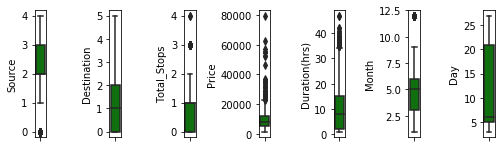

In [52]:
collist=train2.columns.values
ncol=15
nrow=5
plt.figure(figsize=(ncol,10))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [53]:
from scipy.stats import zscore
z_sc=np.abs(zscore(train2))
train2=train2.loc[(z_sc<3).all(axis=1)]

In [54]:
train2.shape

(10488, 8)

In [55]:
train2.skew()

Airline          0.730245
Source          -0.436750
Destination      1.262943
Total_Stops      0.229964
Price            0.415921
Duration(hrs)    0.764762
Month            0.634817
Day              0.352737
dtype: float64

In [56]:
train2['Destination']=np.log1p(train2['Destination'])

In [57]:
train2.skew()

Airline          0.730245
Source          -0.436750
Destination      0.282817
Total_Stops      0.229964
Price            0.415921
Duration(hrs)    0.764762
Month            0.634817
Day              0.352737
dtype: float64

In [58]:
train2['Airline']=np.log1p(train2['Airline'])

In [59]:
train2['Duration(hrs)']=np.log1p(train2['Duration(hrs)'])

In [60]:
train2.skew()

Airline         -0.693735
Source          -0.436750
Destination      0.282817
Total_Stops      0.229964
Price            0.415921
Duration(hrs)   -0.098920
Month            0.634817
Day              0.352737
dtype: float64

In [61]:
x_train=train2
y_train=train2['Price']

In [62]:
x_train.drop(['Price'],axis=1,inplace=True)

In [63]:
x_train

,Airline,Source,Destination,Total_Stops,Duration(hrs),Month,Day
0,1.386294,0,1.791759,0.0,1.098612,3,24
1,0.693147,3,0.000000,2.0,2.079442,1,5
2,1.609438,2,0.693147,2.0,2.995732,9,6
3,1.386294,3,0.000000,1.0,1.791759,12,5
4,1.386294,0,1.791759,1.0,1.609438,1,3
...,...,...,...,...,...,...,...
10678,0.000000,3,0.000000,0.0,1.098612,9,4
10679,0.693147,3,0.000000,0.0,1.098612,4,27
10680,1.609438,0,1.098612,0.0,1.386294,4,27
10681,2.397895,0,1.791759,0.0,1.098612,1,3


In [64]:
test2

,Airline,Source,Destination,Total_Stops,Price,Set,Duration(hrs),Month,Day,year
10683,4,2,1,1.0,NaN,test,10,6,6,2019
10684,3,3,0,1.0,NaN,test,4,12,5,2019
10685,4,2,1,1.0,NaN,test,23,5,21,2019
10686,6,2,1,1.0,NaN,test,13,5,21,2019
10687,0,0,2,0.0,NaN,test,2,6,24,2019
...,...,...,...,...,...,...,...,...,...,...
13349,1,3,0,1.0,NaN,test,23,6,6,2019
13350,3,3,0,0.0,NaN,test,2,3,27,2019
13351,4,2,1,1.0,NaN,test,6,6,3,2019
13352,1,2,1,1.0,NaN,test,15,6,3,2019


In [65]:
test2.drop(['Price','Set','year'],axis=1,inplace=True)
test2.shape

(2670, 7)

In [66]:
from scipy.stats import zscore
z_sc=np.abs(zscore(test2))
test2=test2.loc[(z_sc<3).all(axis=1)]


In [67]:
test2.shape

(2642, 7)

In [68]:
x_test=test2

In [69]:
x_test

,Airline,Source,Destination,Total_Stops,Duration(hrs),Month,Day
10683,4,2,1,1.0,10,6,6
10684,3,3,0,1.0,4,12,5
10685,4,2,1,1.0,23,5,21
10686,6,2,1,1.0,13,5,21
10687,0,0,2,0.0,2,6,24
...,...,...,...,...,...,...,...
13349,1,3,0,1.0,23,6,6
13350,3,3,0,0.0,2,3,27
13351,4,2,1,1.0,6,6,3
13352,1,2,1,1.0,15,6,3


In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def r2scoref(reg,x,y):
    max_r_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            r_state=r
            plt.scatter(x=y_test,y=y_pred)
    print('Maximum r2 score corresponding to random state',r_state,'is',max_r_score)
    return(r_state)

Maximum r2 score corresponding to random state 81 is 0.5525762164653876


81

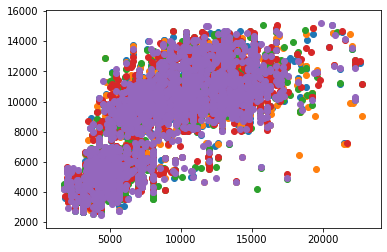

In [72]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r2scoref(lr,x_train,y_train)

Maximum r2 score corresponding to random state 71 is 0.7315693119484239


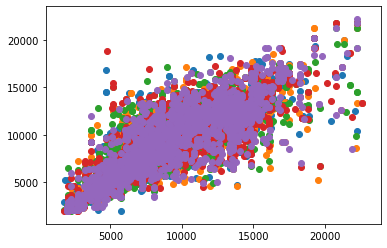

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
r_state=r2scoref(knr,x_train,y_train)

Maximum r2 score corresponding to random state 81 is 0.5525762567708483


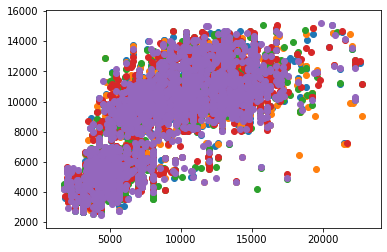

In [76]:
from sklearn.linear_model import Lasso
lso=Lasso(alpha=0.001)
r_state=r2scoref(lso,x_train,y_train)

In [78]:
from sklearn.model_selection import cross_val_score
print('Mean r2_score for KN regression is:',cross_val_score(knr,x_train,y_train,cv=10,scoring="r2").mean())
print('Standard Deviation for KN regression is :',cross_val_score(knr,x_train,y_train,cv=5,scoring="r2").std())

Mean r2_score for KN regression is: 0.7114269265238989
Standard Deviation for KN regression is : 0.011638663070377999


In [81]:
from sklearn.externals import joblib
joblib.dump(knr,'Flightfare_Prediction.pkl')
        

IndentationError: unexpected indent (<ipython-input-81-bc41782ff823>, line 4)